In [1]:
import gpxpy
import gpxpy.gpx
import pandas as pd
import geopandas as gpd
import numpy as np
import math
import pdb
#from folium.plugins import MiniMap
from folium import plugins
from folium.map import FitBounds
import folium
from folium.plugins import HeatMap
from IPython.display import display, HTML
import branca
from collections import namedtuple
import xml.etree.ElementTree as ET
import os
import shapely.geometry
%matplotlib inline


In [2]:
def process_gpx_to_df(file_name):

    gpx = gpxpy.parse(open(file_name))  
    
    #(1)make DataFrame
    track = gpx.tracks[0]
    segment = track.segments[0]
    # Load the data into a Pandas dataframe (by way of a list)
    data = []
    segment_length = segment.length_3d()
    for point_idx, point in enumerate(segment.points):
        data.append([point.longitude, point.latitude,point.elevation,
                     point.time, segment.get_speed(point_idx)])
#         used this just for debugging
#         if segment.get_speed(point_idx) != None:
#             print ("point speed = {}".format(segment.get_speed(point_idx)))
#         elif point_idx > 0:
#             print ("calculated speed = {}".format(point.speed))
    columns = ['Longitude', 'Latitude', 'Altitude', 'Time', 'Speed']
    gpx_df = pd.DataFrame(data, columns=columns)
    
    #2(make points tuple for line)
    points = []
    for track in gpx.tracks:
        for segment in track.segments:        
            for point in segment.points:
                points.append(tuple([point.latitude, point.longitude]))
    
    return gpx_df, points

In [3]:
# filename = '/media/psf/Home/Downloads/Lurgashall and beyond.gpx'
# fname = '/media/psf/Home/Downloads/Run_to_the_hills_.gpx'
fname = '/media/psf/Home/Documents/GitHub/GPX/southseaLoop.gpx'

In [4]:
gpx_df, points = process_gpx_to_df(fname)

/home/parallels/.local/lib/python3.6/site-packages/seaborn/relational.py:831: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


4195     59.681179
4196     59.718010
4197     60.643472
4198     61.990111
4199     56.995961
4200     90.236029
4201    128.763289
4202     88.292458
4203     39.729187
4204     26.762401
Name: Speed, dtype: float64

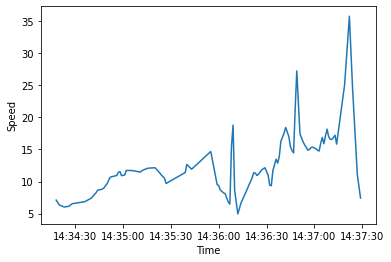

In [16]:
import seaborn as sns
sns.lineplot(x=gpx_df['Time'].iloc[4100:4205], y=gpx_df['Speed'].iloc[4100:4205])

gpx_df['Speed'].iloc[4195:4205] * 3.6

In [8]:
gpxpy.info

0       4.565173
1       4.731115
2       4.901365
3       5.226475
4       5.942622
          ...   
4351    6.376417
4352    6.254175
4353    5.794242
4354    5.327755
4355    5.163430
Name: Speed, Length: 4356, dtype: float64

In [89]:
# list_colors = [
#     "#00FF00",
#     "#12FF00",
#     "#24FF00",
#     "#35FF00",
#     "#47FF00",
#     "#58FF00",
#     "#6AFF00",
#     "#7CFF00",
#     "#8DFF00",
#     "#9FFF00",
#     "#B0FF00",
#     "#C2FF00",
#     "#D4FF00",
#     "#E5FF00",
#     "#F7FF00",
#     "#FFF600",
#     "#FFE400",
#     "#FFD300",
#     "#FFC100",
#     "#FFAF00",
#     "#FF9E00",
#     "#FF8C00",
#     "#FF7B00",
#     "#FF6900",
#     "#FF5700",
#     "#FF4600",
#     "#FF3400",
#     "#FF2300",
#     "#FF1100",
#     "#FF0000",
# ]

list_colors = [
    "#00FF00",
    "#12FF00",
    "#24FF00",
    "#35FF00",
    "#47FF00",
    "#58FF00",
    "#6AFF00",
    "#7CFF00",
    "#8DFF00"
]
color_dict = {i: list_colors[i] for i in range(len(list_colors))}

In [33]:
# bins = [range(30)]
gpx_df['Speed_cat'] = pd.cut(gpx_df['Speed'], bins=9, labels=list_colors, include_lowest=True)

In [ ]:
for idx, row in list_colors.interrow():
    temp_points = pdf[pdf.Clus_Db == clust_number]   

In [26]:
import seaborn as sns

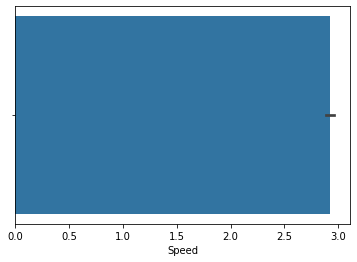

In [37]:
sns.barplot(gpx_df["Speed"])

In [38]:
gdf = gpd.GeoDataFrame(
    gpx_df, geometry=gpd.points_from_xy(gpx_df.Longitude, gpx_df.Latitude))

In [39]:
start_long = gdf['Longitude'][0]
start_lat = gdf['Latitude'][0]

In [41]:
centre_lat = gdf.unary_union.centroid.y
centre_long = gdf.unary_union.centroid.x
print (centre_lat,centre_long)

51.02731513264674 -0.9372466274984855


In [61]:
gdf.geometry

0       POINT (-0.93348 51.01355)
1       POINT (-0.93348 51.01355)
2       POINT (-0.93348 51.01355)
3       POINT (-0.93348 51.01355)
4       POINT (-0.93348 51.01355)
                  ...            
3316    POINT (-0.93364 51.01342)
3317    POINT (-0.93364 51.01342)
3318    POINT (-0.93364 51.01342)
3319    POINT (-0.93365 51.01342)
3320    POINT (-0.93365 51.01342)
Name: geometry, Length: 3321, dtype: geometry

In [63]:
my_map = folium.Map(location=[centre_lat, centre_long], zoom_start=14, bounds=(51.01216, -0.948367))

for speed_color in set(gdf.Speed_cat): 
    folium.PolyLine(, color=speed_color, weight=3, opacity=1).add_to(my_map)
# FitBounds(51.01216, -0.948367).add_to(my_map)
my_map

ValueError: Expected two (lat, lon) values for location, instead got: 0       51.013545
1       51.013545
2       51.013545
3       51.013545
4       51.013545
          ...    
3316    51.013424
3317    51.013424
3318    51.013424
3319    51.013422
3320    51.013422
Name: Latitude, Length: 3321, dtype: float64.

In [91]:
shape(gdf)

NameError: name 'shape' is not defined

In [6]:
geo_df = gpd.to

ModuleNotFoundError: No module named 'cartopy'